<a href="https://colab.research.google.com/github/svf5398/ParentPaper/blob/main/Final%20Implementation/Novel_Idea_CombinedAdults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Adult Datasets: Pre-processing**

First, I began by importing the required packages. Then, I imported the Adult 2017 and Adult 2018 datasets as CSV files.

In [ ]:
from dataclasses import dataclass
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import  LabelEncoder
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from numpy import set_printoptions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Adult_Data_2017 = pd.read_csv('Adult-Data2017.csv', na_values='?')
Adult_Data_2018 = pd.read_csv('Adult-Data2018.csv', na_values='?')

## MY ADDED CODE BLOCK:

I pre-processed the Adult 2017 and Adult 2018 datasets because they both contain the same data, but their column names slightly differ. Therefore, I renamed the columns of the Adult 2018 dataset so they would match the column names of the Adult 2017 dataset in order to combine them. I renamed the classification column in both datasets to "ASD," which indicates if each case does or does not have autism. Last, I dropped the identifier column for all patients in both datasets. 

In [ ]:
Adult_Data_2017 = Adult_Data_2017.drop(columns='id')
Adult_Data_2018 = Adult_Data_2018.drop(columns='Case No')
Adult_Data_2018 = Adult_Data_2018.drop(columns='Language')
Adult_Data_2018 = Adult_Data_2018.drop(columns='Why taken the screening ')
Adult_Data_2017 = Adult_Data_2017.rename(columns={'Class/ASD':'ASD'})
Adult_Data_2018 = Adult_Data_2018.rename(columns={'A1': 'A1_Score', 'A2': 'A2_Score', 'A3': 'A3_Score', 'A4': 'A4_Score', 'A5': 'A5_Score', 'A6': 'A6_Score', 'A7': 'A7_Score', 'A8': 'A8_Score', 'A9': 'A9_Score', 'A10': 'A10_Score', 'Age': 'age', 'Sex': 'gender', 'Ethnicity': 'ethnicity', 'Jaundice ': 'jundice', 'Family_ASD': 'autism', 'Residence': 'contry_of_res', 'Used_App_Before': 'used_app_before', 'Score': 'result', 'Screening Type': 'age_desc', 'User': 'relation', 'Class': 'ASD'}) 

## MY ADDED CODE BLOCK:

Here, the Adult 2017 and Adult 2018 datasets are combined to make a larger dataset represetning 1,822 adults.

In [ ]:
Adult_Data_Combined = Adult_Data_2017.append(Adult_Data_2018, ignore_index=True)
Adult_Data_Combined

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD,autism
0,1,1,1,1,0,0,1,1,0,0,...,White-European,no,no,United States,no,6,18 and more,Self,NO,NaN
1,1,1,0,1,0,0,0,1,0,1,...,Latino,no,yes,Brazil,no,5,18 and more,Self,NO,NaN
2,1,1,0,1,1,0,1,1,1,1,...,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES,NaN
3,1,1,0,1,0,0,1,1,0,1,...,White-European,no,yes,United States,no,6,18 and more,Self,NO,NaN
4,1,0,0,0,0,0,0,1,0,0,...,NaN,no,no,Egypt,no,2,18 and more,NaN,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1817,0,1,1,0,0,0,0,0,0,0,...,white,no,NaN,New Zealand,no,2,17 and more,self,NO,yes
1818,1,1,1,1,1,1,1,1,1,1,...,white,no,NaN,United Kingdom,no,10,17 and more,self,YES,no
1819,1,0,0,0,0,0,1,1,1,1,...,white,yes,NaN,United Kingdom,no,5,17 and more,self,NO,yes
1820,1,1,0,1,1,1,0,1,0,1,...,white,no,NaN,United States,no,7,17 and more,self,YES,no


## MY ADDED CODE BLOCK:

For the combined dataset, I am searching under the "ASD" classification column and counting how many cases are given the values "YES" and "NO." This is done because there is a drastic imbalance between the classification data, with bias towards cases labelled "NO." This imbalance can impact the accuracy of the machine learning models, meaning they may not truly represent correct evaluation metrics and accuracy in predicting ASD cases.

In [ ]:
Adult_Data_Combined['ASD'].value_counts()

NO     1275
YES     547
Name: ASD, dtype: int64

Here, I am normalizing the dataset to ensure that there are an equal amount of ASD and non-ASD cases in the "ASD" column. Since there are more "NO" cases than "YES" cases (1,275 no vs 547 yes), I sampled 547 "NO" cases to return a random selection of these cases. I combined these specific "NO" cases with the 547 "YES" cases to create the final dataset.

## MY ADDED CODE BLOCK:

In [ ]:
class_no = Adult_Data_Combined.query('ASD == "NO"').sample(n=547)
class_yes = Adult_Data_Combined.query('ASD == "YES"')
Adult_Data_Combined = pd.concat([class_no,class_yes], axis=0)
Adult_Data_Combined

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD,autism
1127,1,0,0,0,0,0,0,0,0,0,...,white,no,NaN,Kazakhstan,no,1,17 and more,others,NO,no
208,1,1,1,1,0,0,1,1,0,0,...,White-European,no,no,United Kingdom,no,6,18 and more,Self,NO,NaN
1150,1,0,1,0,0,1,0,1,0,0,...,middle eastern,no,NaN,United Arab Emirates,no,4,17 and more,self,NO,no
1747,1,1,1,1,0,0,0,0,0,0,...,asian,no,NaN,Australia,no,4,17 and more,self,NO,no
19,0,0,0,0,0,0,1,1,0,1,...,NaN,yes,no,United Arab Emirates,no,3,18 and more,NaN,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,1,0,1,0,1,1,0,1,1,1,...,middle eastern,yes,NaN,United Kingdom,no,7,17 and more,relative,YES,no
1814,1,1,1,1,1,0,1,1,1,0,...,white,no,NaN,United Kingdom,no,8,17 and more,parent,YES,yes
1815,1,0,1,1,1,1,1,1,1,1,...,white,no,NaN,United States,no,9,17 and more,self,YES,no
1818,1,1,1,1,1,1,1,1,1,1,...,white,no,NaN,United Kingdom,no,10,17 and more,self,YES,no


In [ ]:
for column in Adult_Data_Combined.columns:
    if Adult_Data_Combined[column].dtype == type(object):
        le = LabelEncoder()
        Adult_Data_Combined[column] = le.fit_transform(Adult_Data_Combined[column].astype(str))
Adult_Data_Combined.drop(['age_desc'] ,  axis = 1, inplace = True)
Adult_Data_Combined.replace("?",np.nan,inplace=True) #replace ? with nan

In [ ]:
total_missing_data = Adult_Data_Combined.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (Adult_Data_Combined.isnull().sum()/Adult_Data_Combined.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data, 
        percent_of_missing_data
    ], 
    axis=1, 
    keys=['Total', 'Percent']
)
missing_data.head(10)

,Total,Percent
age,2,0.182815
gender,0,0.000000
ASD,0,0.000000
relation,0,0.000000
result,0,0.000000
used_app_before,0,0.000000
contry_of_res,0,0.000000
austim,0,0.000000
jundice,0,0.000000
ethnicity,0,0.000000


# Missing Data mean value or dropna():

In [ ]:
Adult_Data_Combined.loc[(Adult_Data_Combined['age'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,ASD,autism
91,0,1,0,0,1,0,1,0,0,1,...,0,16,0,1,36,0,4,7,0,0
62,0,0,0,0,0,0,0,0,0,0,...,1,16,0,1,54,0,0,7,0,0


In [ ]:
Adult_Data_Combined.age[62]=Adult_Data_Combined.age.median()
Adult_Data_Combined.age[91]=Adult_Data_Combined.age.median()
Adult_Data_Combined.loc[(Adult_Data_Combined['age'].isnull())]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,relation,ASD,autism


# **Adult Dataset: Feature Engineering**

# ANOVA

In [ ]:
X_Feature = Adult_Data_Combined.iloc[:,0:19]  #independent columns
Y_Feature = Adult_Data_Combined.iloc[:,19]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeaturesANOVA = SelectKBest(score_func=f_classif, k=10)
fitANOVA = bestfeaturesANOVA.fit(X_Feature,Y_Feature)
# summarize scores
set_printoptions(precision=3)
dfscores = pd.DataFrame(fitANOVA.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ANOVAfeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ANOVAfeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
print(ANOVAfeatureScores )

            Feature        Score
0          A1_Score   139.324138
1          A2_Score   140.398104
2          A3_Score   323.200878
3          A4_Score   392.256236
4          A5_Score   704.136515
5          A6_Score   704.213890
6          A7_Score   197.624330
7          A8_Score    90.598798
8          A9_Score   822.278489
9         A10_Score   302.814397
10              age     3.033601
11           gender     5.020378
12        ethnicity    23.505296
13          jundice    11.072098
14           austim     1.766324
15    contry_of_res     3.086034
16  used_app_before     7.543656
17           result  3120.423068
18         relation     7.188013


In [ ]:
print('Univariate Selection using ANOVA')
print(ANOVAfeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using ANOVA
            Feature        Score
17           result  3120.423068
8          A9_Score   822.278489
5          A6_Score   704.213890
4          A5_Score   704.136515
3          A4_Score   392.256236
2          A3_Score   323.200878
9         A10_Score   302.814397
6          A7_Score   197.624330
1          A2_Score   140.398104
0          A1_Score   139.324138
7          A8_Score    90.598798
12        ethnicity    23.505296
13          jundice    11.072098
16  used_app_before     7.543656
18         relation     7.188013


# Chi Test

In [ ]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fitChi = bestfeatures.fit(X_Feature,Y_Feature)
dfscores = pd.DataFrame(fitChi.scores_)
dfcolumns = pd.DataFrame(X_Feature.columns)
#concat two dataframes for better visualization 
ChifeatureScores = pd.concat([dfcolumns,dfscores],axis=1)
ChifeatureScores.columns = ['Feature','Score']  #naming the dataframe columns
ChifeatureScores

,Feature,Score
0,A1_Score,25.119266
1,A2_Score,57.189189
2,A3_Score,102.085008
3,A4_Score,105.975469
4,A5_Score,154.851216
5,A6_Score,245.034115
6,A7_Score,80.911661
7,A8_Score,24.668394
8,A9_Score,247.420849
9,A10_Score,77.504749


In [ ]:
print('Univariate Selection using chi')
print(ChifeatureScores.nlargest(15,'Score'))  #print 15 best features

Univariate Selection using chi
          Feature       Score
17         result  934.581721
8        A9_Score  247.420849
5        A6_Score  245.034115
4        A5_Score  154.851216
3        A4_Score  105.975469
2        A3_Score  102.085008
6        A7_Score   80.911661
9       A10_Score   77.504749
12      ethnicity   68.542078
1        A2_Score   57.189189
15  contry_of_res   33.455337
0        A1_Score   25.119266
7        A8_Score   24.668394
10            age   21.785353
18       relation    9.982464


# Correlation

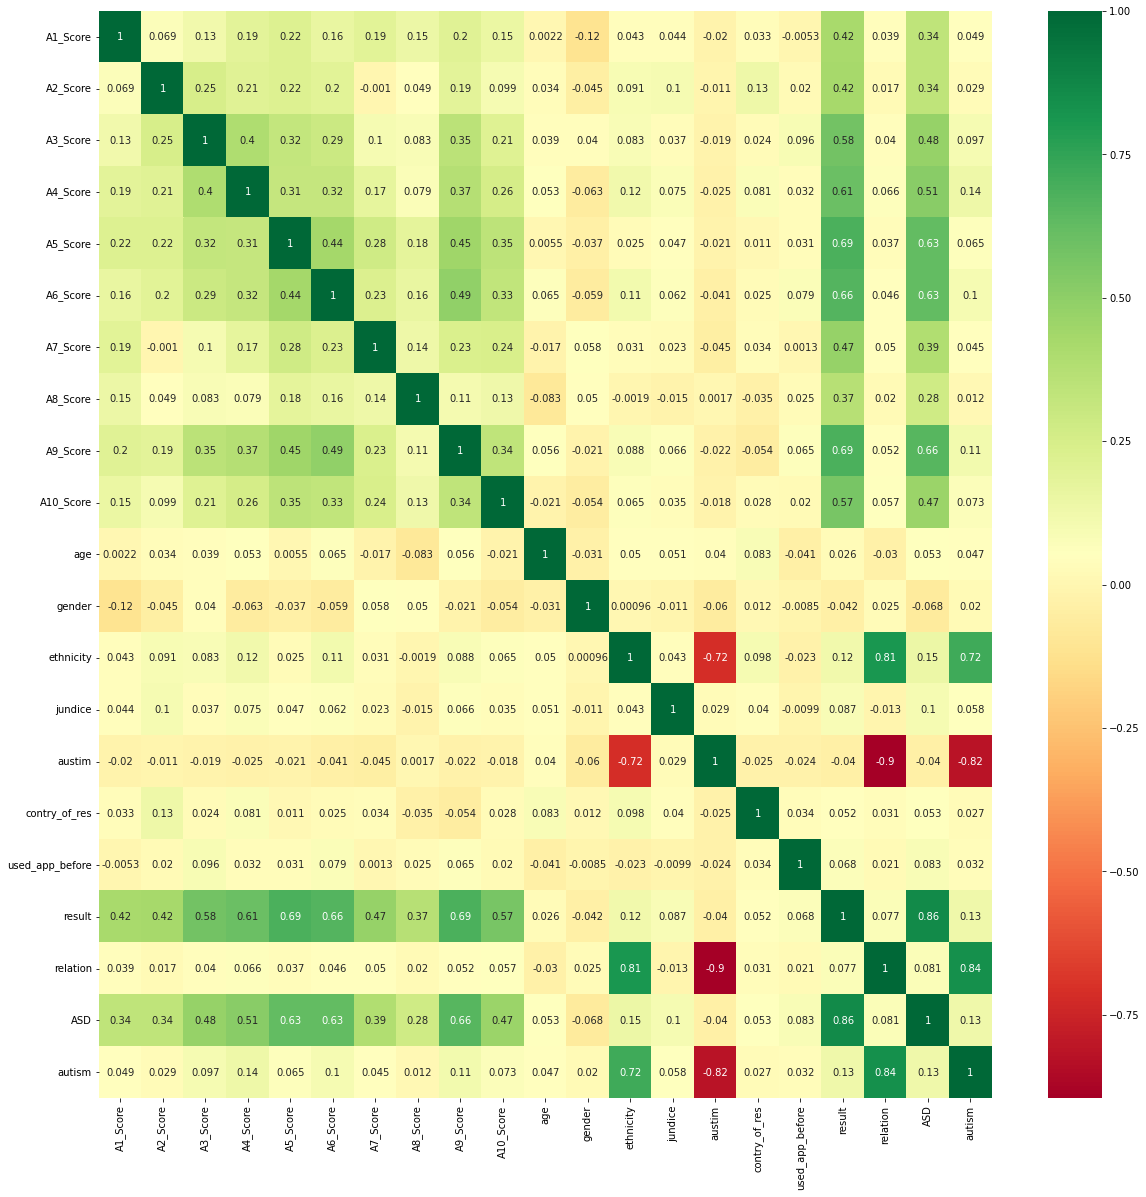

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = Adult_Data_Combined.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Adult_Data_Combined[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# **Adult Datasets: Models**

## MODIFIED CODE: ADDED HYPERPARAMETER TUNING

In [ ]:
import time
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import  LabelEncoder
import pandas as pd
import numpy as np

Adult_Data_Combined.rename(columns={'ASD': 'class'}, inplace=True)

for column in Adult_Data_Combined.columns:
    if Adult_Data_Combined[column].dtype == type(object):
        le = LabelEncoder()
        Adult_Data_Combined[column] = le.fit_transform(Adult_Data_Combined[column].astype(str))

names = []
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(kernel='linear'))) # hyperparamter tuning -> complete success
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))

X=Adult_Data_Combined[['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score']]
Y=Adult_Data_Combined['class']

start_time = 0
elapsed_time = 0
confusion=0
pred=0

# Cross Validation

In [ ]:
seed = 7
kfold = KFold(n_splits=10) 
for name, m in models:
    start_time = time.time()
    pred = cross_val_predict(m, X,Y, cv=kfold )
    elapsed_time = time.time() - start_time   
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    error = (FP + FN) / float(TP + TN + FP + FN) # equal #error_rate = 1 - accuracy
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================')

LR
0.1450
99.9086
99.8172
100.0000
99.9086
99.9087
0.0914
LDA
0.1558
95.7038
91.4077
100.0000
95.7038
95.8808
4.2962
CART
0.0676
96.9835
96.1609
97.8062
96.9835
97.0082
3.0165
NB
0.1567
94.7898
94.6984
94.8812
94.7898
94.7945
5.2102
KNN
0.4396
92.2303
95.0640
89.3967
92.2303
92.0038
7.7697
SVM
0.1556
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
AB
0.9956
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
0.9987
98.9031
97.8062
100.0000
98.9031
98.9150
1.0969
RF
1.6523
96.6179
95.6124
97.6234
96.6179
96.6516
3.3821
ET
1.4057
96.8921
96.5265
97.2578
96.8921
96.9035
3.1079


# Leave

In [ ]:
num_folds = 10
for name, m in models: 
    loocv = LeaveOneOut() 
    start_time=time.time()
    pred = cross_val_predict(m, X,Y, cv=loocv )
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y, pred, average='binary')
    AUC=metrics.roc_auc_score(Y, pred)
    error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(error*100.0))
    print(' =======================') 

LR
15.3584
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
10.4328
95.8867
91.7733
100.0000
95.8867
96.0492
4.1133
CART
4.4538
98.0804
96.5265
99.6344
98.0804
98.1098
1.9196
NB
4.1636
95.4296
95.2468
95.6124
95.4296
95.4380
4.5704
KNN
5.4459
94.0585
96.5265
91.5905
94.0585
93.9082
5.9415
SVM
7.7649
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
AB
102.2911
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
110.2675
99.5430
99.0859
100.0000
99.5430
99.5450
0.4570
RF
186.8042
97.9890
96.5265
99.4516
97.9890
98.0180
2.0110
ET
157.9845
98.4461
97.6234
99.2687
98.4461
98.4587
1.5539


#Train Test Split

In [ ]:
test_size = 0.3
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
for name, m in models:
    model = m
    start_time = time.time()
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    elapsed_time = time.time() - start_time
    confusion = metrics.confusion_matrix(Y_test,pred)
    #[row, column]
    TP = confusion[1, 1]
    TN = confusion[0, 0]
    FP = confusion[0, 1]
    FN = confusion[1, 0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    specificity = TN / (TN + FP)
    sensitivity = TP / float(FN + TP)
    F1Score = f1_score(Y_test, pred, average='binary')
    AUC=metrics.roc_auc_score(Y_test, pred)
    class_error = (FP + FN) / float(TP + TN + FP + FN)
    print(name)
    print('%.4f' % elapsed_time)
    print('%.4f' % float(accuracy *100.0))
    print('%.4f' %float(specificity*100.0))
    print('%.4f' %float(sensitivity*100.0))
    print('%.4f' %float(AUC*100.0))
    print('%.4f' %float(F1Score*100.0))
    print('%.4f' %float(class_error*100.0))
    print(' ===========================')

LR
0.0088
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
LDA
0.0050
95.4407
91.1765
100.0000
95.5882
95.4955
4.5593
CART
0.0071
95.4407
92.3529
98.7421
95.5475
95.4407
4.5593
NB
0.0063
96.0486
96.4706
95.5975
96.0340
95.8991
3.9514
KNN
0.0209
95.4407
92.3529
98.7421
95.5475
95.4407
4.5593
SVM
0.0115
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
AB
0.0956
100.0000
100.0000
100.0000
100.0000
100.0000
0.0000
GBM
0.0996
98.1763
97.6471
98.7421
98.1946
98.1250
1.8237
RF
0.1923
96.6565
94.7059
98.7421
96.7240
96.6154
3.3435
ET
0.1435
96.6565
94.7059
98.7421
96.7240
96.6154
3.3435
